### Build a random forest classifier to predict the risk of heart disease based on a dataset of patient
### information. The dataset contains 303 instances with 14 features, including age, sex, chest pain type,
### resting blood pressure, serum cholesterol, and maximum heart rate achieved.
### Dataset link: https://drive.google.com/file/d/1bGoIE4Z2kG5nyh-fGZAJ7LH0ki3UfmSJ/view?
### usp=share_link
### Q1. Preprocess the dataset by handling missing values, encoding categorical variables, and scaling the
### numerical features if necessary.
### Q2. Split the dataset into a training set (70%) and a test set (30%).
### Q3. Train a random forest classifier on the training set using 100 trees and a maximum depth of 10 for each
### tree. Use the default values for other hyperparameters.
### Q4. Evaluate the performance of the model on the test set using accuracy, precision, recall, and F1 score.
### Q5. Use the feature importance scores to identify the top 5 most important features in predicting heart
### disease risk. Visualise the feature importances using a bar chart.
### Q6. Tune the hyperparameters of the random forest classifier using grid search or random search. Try
### different values of the number of trees, maximum depth, minimum samples split, and minimum samples
### leaf. Use 5-fold cross-validation to evaluate the performance of each set of hyperparameters.
### Q7. Report the best set of hyperparameters found by the search and the corresponding performance
### metrics. Compare the performance of the tuned model with the default model.
### Q8. Interpret the model by analysing the decision boundaries of the random forest classifier. Plot the
### decision boundaries on a scatter plot of two of the most important features. Discuss the insights and
### limitations of the model for predicting heart disease risk.

In [1]:
import pandas as pd
import numpy as np
df= pd.read_csv('dataset.csv')

In [2]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
df[df.duplicated()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [18]:
from sklearn.model_selection import train_test_split
X = df.iloc[:, :11]  
y = df.iloc[:, -1]   #

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [20]:
# Q4: Train Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_classifier.fit(X_train, y_train)


RandomForestClassifier(max_depth=10, random_state=42)

In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.8524590163934426
Precision: 0.9259259259259259
Recall: 0.78125
F1 Score: 0.847457627118644


Top 5 most important features: Index(['oldpeak', 'cp', 'thalach', 'chol', 'age'], dtype='object')


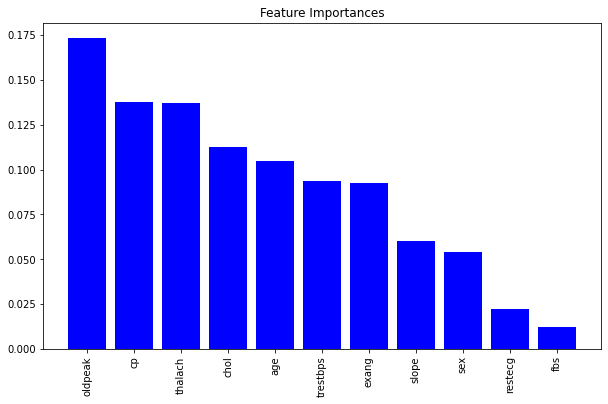

In [24]:
# Visualize feature importances

importances = rf_classifier.feature_importances_
indices = np.argsort(importances)[::-1]
top_features = X_train.columns[indices][:5]  # Assuming X_train is a DataFrame
print("Top 5 most important features:", top_features)

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(len(indices)), importances[indices], color='b', align='center')
plt.xticks(range(len(indices)), X_train.columns[indices], rotation=90)
plt.show()

In [25]:
# Q6: Hyperparameter tuning with Grid Search
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best parameters found by grid search:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)

Best parameters found by grid search: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best cross-validation accuracy: 0.7930272108843537


In [26]:
# Q7: Evaluate performance of tuned model
best_rf_classifier = grid_search.best_estimator_
best_rf_classifier.fit(X_train, y_train)
best_y_pred = best_rf_classifier.predict(X_test)
best_accuracy = accuracy_score(y_test, best_y_pred)
best_precision = precision_score(y_test, best_y_pred)
best_recall = recall_score(y_test, best_y_pred)
best_f1 = f1_score(y_test, best_y_pred)

print("Best Model Performance:")
print("Accuracy:", best_accuracy)
print("Precision:", best_precision)
print("Recall:", best_recall)
print("F1 Score:", best_f1)


Best Model Performance:
Accuracy: 0.819672131147541
Precision: 0.8620689655172413
Recall: 0.78125
F1 Score: 0.8196721311475409
